In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


C:\Users\ashra\AppData\Local\Temp\ipykernel_6688\3802905968.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ifind_data = pd.read_excel(r'C:\Users\ashra\Documents\mini project\contents\fake-news-detection-system-main\fake-news-detection-system-main\IFND (1).xlsx')

In [3]:
ifind_data.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,True
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,2020-10-01 00:00:00,True
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,2020-10-01 00:00:00,True
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,True
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,2020-10-01 00:00:00,True


In [4]:
ifind_data['Label'].value_counts()

Label
True    37800
Fake    18914
Name: count, dtype: int64

In [5]:
ifind_data.rename(columns={'Statement': 'text', 'Label': 'target','Date':'date'}, inplace=True)

In [6]:
ifind_data['target'] = ifind_data['target'].astype(str)
ifind_data['target'].replace(['True','Fake'],[1,0], inplace=True)

C:\Users\ashra\AppData\Local\Temp\ipykernel_6688\3602315626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ifind_data['target'].replace(['True','Fake'],[1,0], inplace=True)
C:\Users\ashra\AppData\Local\Temp\ipykernel_6688\3602315626.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ifind_data

In [7]:
ifind_data['target'].value_counts()

target
1    37800
0    18914
Name: count, dtype: int64

In [8]:
ifind_data.head()

,id,text,Image,Web,Category,date,target
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,1
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,2020-10-01 00:00:00,1
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,2020-10-01 00:00:00,1
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,1
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,2020-10-01 00:00:00,1


target
1    37800
0    18914
Name: count, dtype: int64


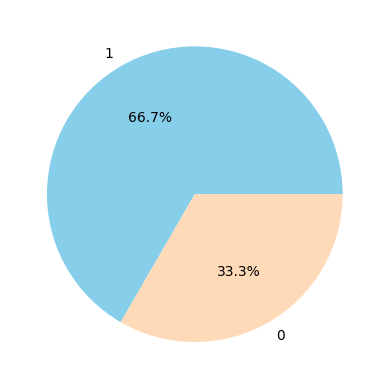

In [9]:
print(ifind_data["target"].value_counts())
g1 = plt.pie(ifind_data["target"].value_counts().values,explode=[0,0],labels=ifind_data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
plt.show()

Category
GOVERNMENT    10923
VIOLENCE      10578
COVID-19       8710
POLITICS       8670
ELECTION       8396
TERROR         4384
MISLEADING     4059
TRAD            976
MISLEADIND       18
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

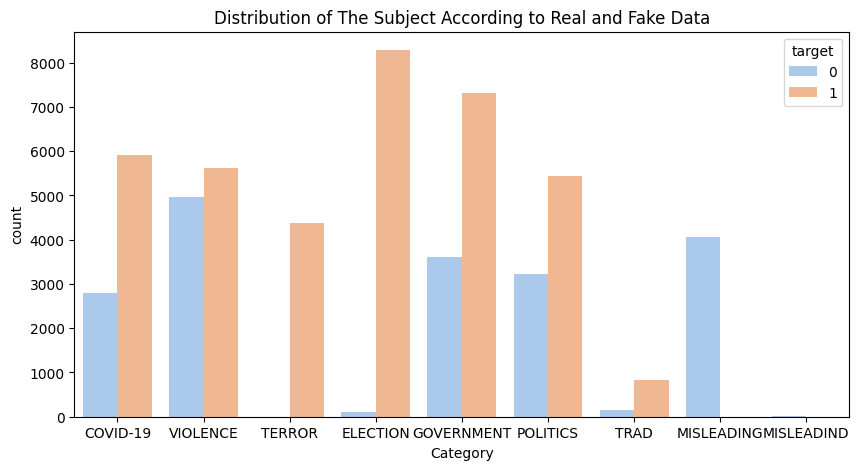

In [10]:
print(ifind_data.Category.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="Category",  hue='target', data=ifind_data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

Web
TRIBUNEINDIA        11832
AUGMENT             11321
THEPRINT             8582
THESTATESMAN         7202
THESTATEMAN          4048
INDIANEXPRESS        3983
NEWSMOBILE           2422
INDIATODAY           1698
BOOMLIVE              806
CNN                   778
NEWSMETER             572
ONEINDIA              549
BSMEDIA               449
TEEKHIMIRCHI          387
FACTCRESCENDO         272
AFP                   267
TIMESNOW              238
THELOGICALINDIAN      221
DIGITEYE              175
FACTLY                174
THELOGICALINDIA       173
FACTCHECKER           163
DAPAAN                136
DNAINDIA              121
ALT                    59
WAHSARKAR              42
ENGLISHTRIBUNE         21
INDUSTANTIMES          15
NDTV                    8
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

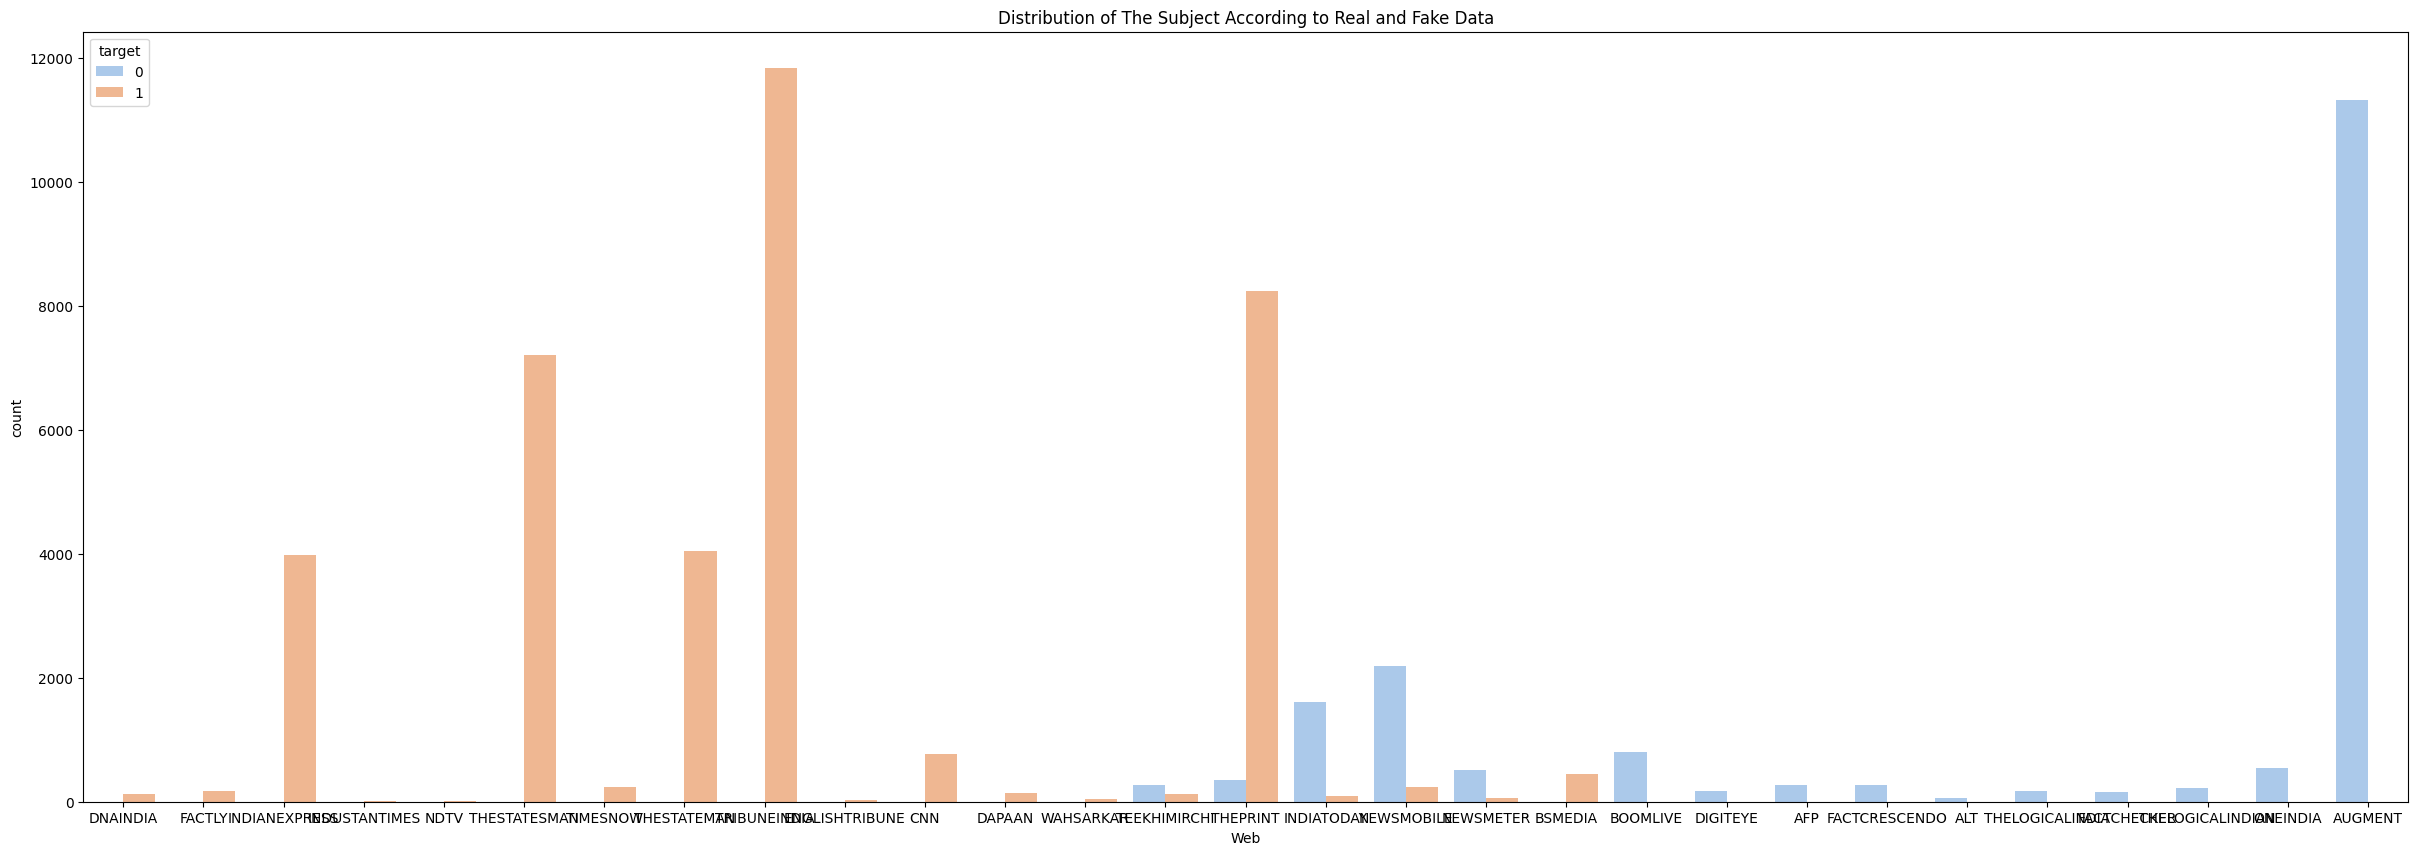

In [11]:
print(ifind_data.Web.value_counts())
plt.figure(figsize=(30, 10))

ax = sns.countplot(x="Web",  hue='target', data=ifind_data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [12]:
ifind_data.groupby(['Web','target'])['id'].count()

Web               target
AFP               0           267
ALT               0            59
AUGMENT           0         11321
BOOMLIVE          0           806
BSMEDIA           1           449
CNN               1           778
DAPAAN            1           136
DIGITEYE          0           175
DNAINDIA          1           121
ENGLISHTRIBUNE    1            21
FACTCHECKER       0           163
FACTCRESCENDO     0           272
FACTLY            1           174
INDIANEXPRESS     1          3983
INDIATODAY        0          1606
                  1            92
INDUSTANTIMES     1            15
NDTV              1             8
NEWSMETER         0           506
                  1            66
NEWSMOBILE        0          2190
                  1           232
ONEINDIA          0           549
TEEKHIMIRCHI      0           262
                  1           125
THELOGICALINDIA   0           173
THELOGICALINDIAN  0           221
THEPRINT          0           344
                  1    

In [13]:
data = ifind_data[['text','target']].copy()

In [14]:
data.head()

,text,target
0,"WHO praises India's Aarogya Setu app, says it ...",1
1,"In Delhi, Deputy US Secretary of State Stephen...",1
2,LAC tensions: China's strategy behind delibera...,1
3,India has signed 250 documents on Space cooper...,1
4,Tamil Nadu chief minister's mother passes away...,1


In [15]:
first_text = data.text[10]
first_text

"Amid stubble burning, Delhi's air quality deteriorates to 'very poor'"

In [16]:
#Removal of html content
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(first_text, "html.parser")
first_text = soup.get_text()
first_text

"Amid stubble burning, Delhi's air quality deteriorates to 'very poor'"

In [17]:
#removal of punctuation marks and special characters
first_text = re.sub('\[[^]]*\]', ' ', first_text)
first_text = re.sub('[^a-zA-Z]',' ',first_text)  # replaces non-alphabets with spaces
first_text = first_text.lower() # Converting from uppercase to lowercase
first_text

<>:2: SyntaxWarning: invalid escape sequence '\['
<>:2: SyntaxWarning: invalid escape sequence '\['
C:\Users\ashra\AppData\Local\Temp\ipykernel_6688\1781642329.py:2: SyntaxWarning: invalid escape sequence '\['
  first_text = re.sub('\[[^]]*\]', ' ', first_text)


'amid stubble burning  delhi s air quality deteriorates to  very poor '

In [18]:
 nltk.download('punkt')
 nltk.download("stopwords") 
 nltk.download('wordnet')
from nltk.corpus import stopwords 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
#tokenization and stopwords
first_text = nltk.word_tokenize(first_text)
first_text = [ word for word in first_text if not word in set(stopwords.words("english"))]
first_text

['amid',
 'stubble',
 'burning',
 'delhi',
 'air',
 'quality',
 'deteriorates',
 'poor']

In [20]:
#lemmatization
import nltk
nltk.download('omw-1.4')
first_text = "Amid stubble burning, Delhi's air quality deteriorates to 'very poor "
lemma = nltk.WordNetLemmatizer()
first_text = [ lemma.lemmatize(word) for word in first_text.split()] 
first_text = " ".join(first_text)
first_text

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ashra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


"Amid stubble burning, Delhi's air quality deteriorates to 'very poor"

In [21]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

<>:8: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\['
C:\Users\ashra\AppData\Local\Temp\ipykernel_6688\775212086.py:8: SyntaxWarning: invalid escape sequence '\['
  return re.sub('\[[^]]*\]', '', text)


In [22]:
#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    #lemma = nltk.WordNetLemmatizer()
    
    final_text = [word for word in text if word not in stopwords.words('english')]
    return " ".join(final_text)

In [23]:
def remove_stopwords(text):
    final_text = []
    final_text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(final_text)

In [24]:
#Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

In [25]:
data['text']=data['text'].apply(remove_html)
data['text']=data['text'].apply(remove_punctuations)
data['text']=data['text'].apply(remove_characters)
data['text']=data['text'].apply(remove_stopwords)

In [26]:
data.head()

,text,target
0,praises India Aarogya Setu app says helped ide...,1
1,Delhi Deputy US Secretary State Stephen Biegun...,1
2,LAC tensions China strategy behind deliberatel...,1
3,India signed documents Space cooperation count...,1
4,Tamil Nadu chief minister mother passes away,1


In [27]:
data.tail()

,text,target
56709,Fact Check Bruce Lee playing ping pong Nunchaku,0
56710,Fact Check Japan construct bridge hours,0
56711,Fact Check Viral video Mexico earthquake years...,0
56712,Fact Check Ballet performance Chinese couple g...,0
56713,Fact Check little boy crossing Jordan alone lo...,0


In [28]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


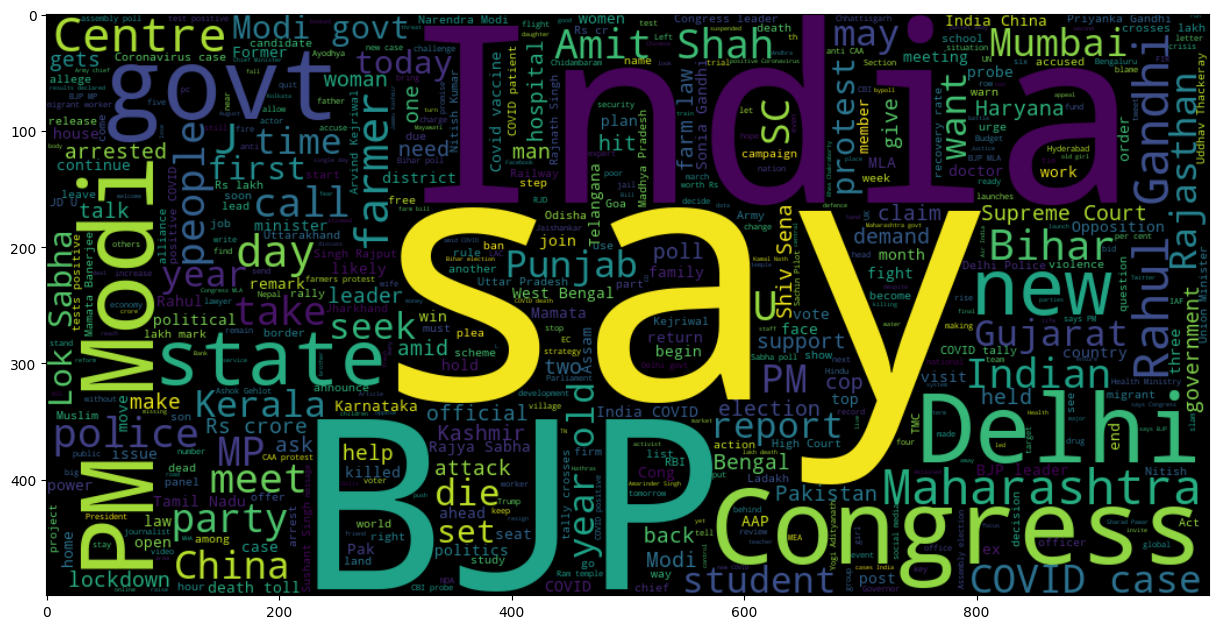

In [29]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

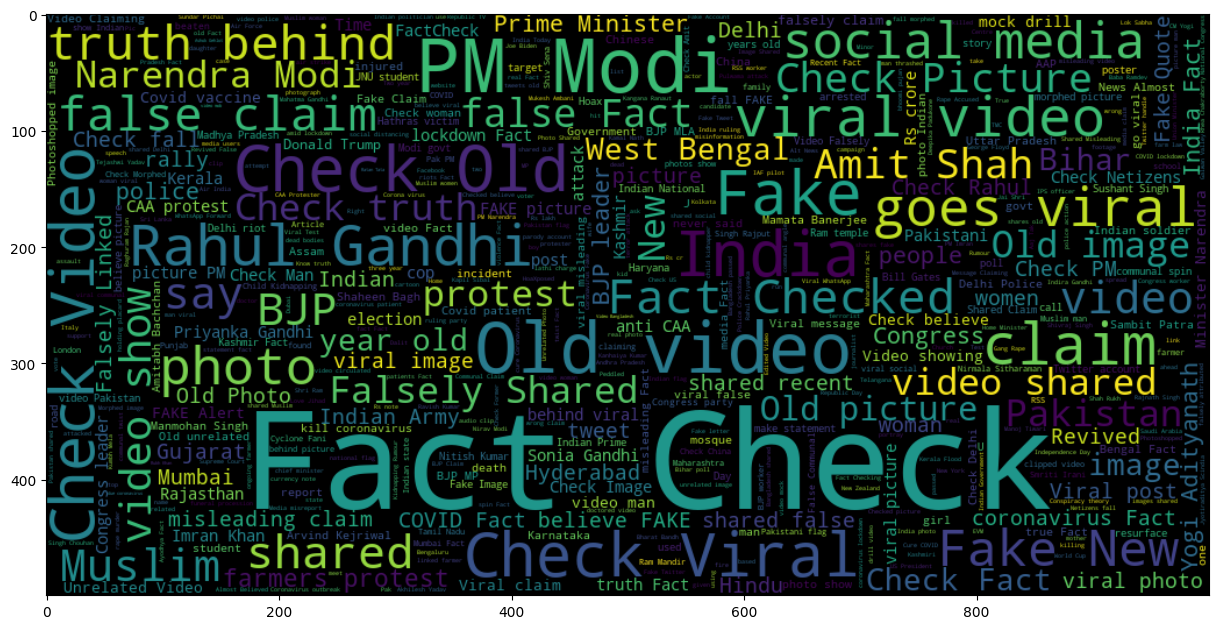

In [30]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

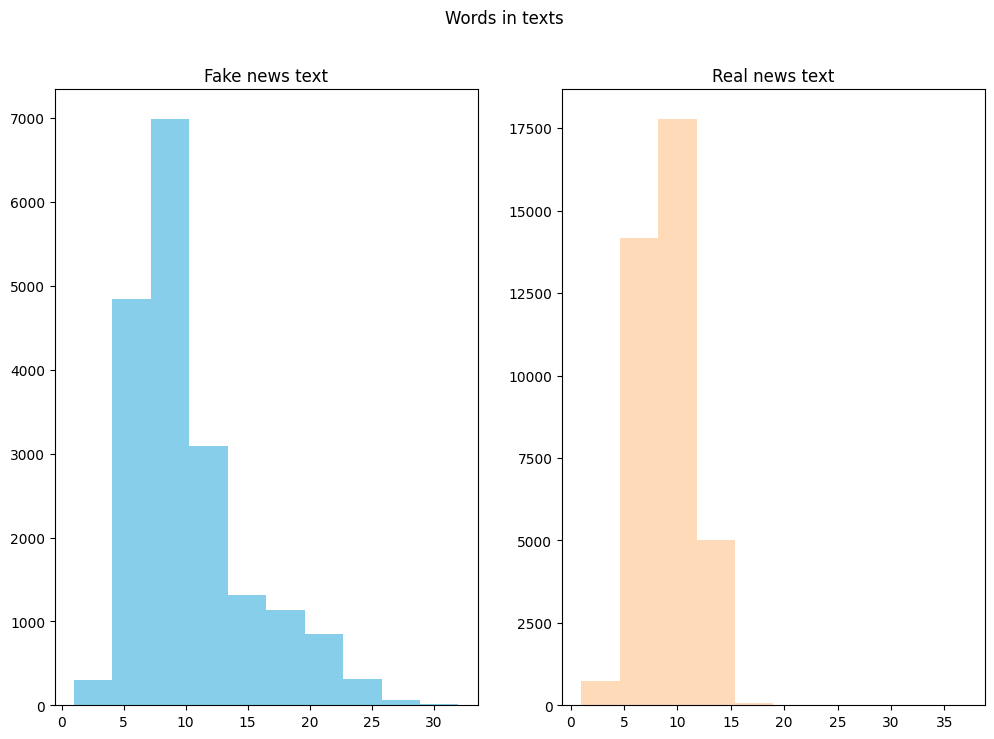

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Fake news text')
text_len=data[data['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

In [32]:
texts = ' '.join(data['text'])

In [33]:
string = texts.split(" ")

In [34]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

       word  count
0   (Fact,)   9958
1  (Check,)   9045
2  (India,)   5122
3    (BJP,)   4680
4   (Modi,)   4518


ValueError: Names should be list-like for a MultiIndex

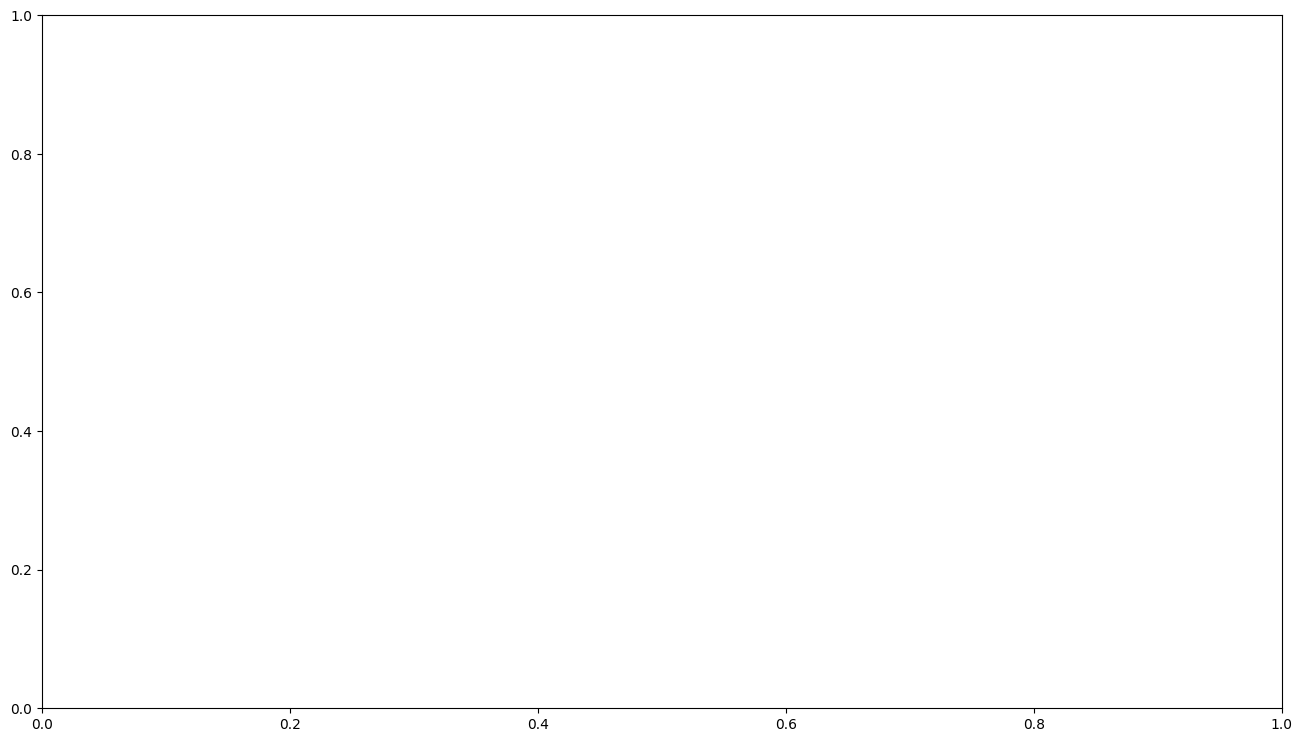

In [35]:
draw_n_gram(string, 1)

              word  count
0    (Fact, Check)   9011
1       (PM, Modi)   2328
2  (Rahul, Gandhi)   1228
3     (Amit, Shah)    739
4           (J, K)    711


ValueError: Names should be list-like for a MultiIndex

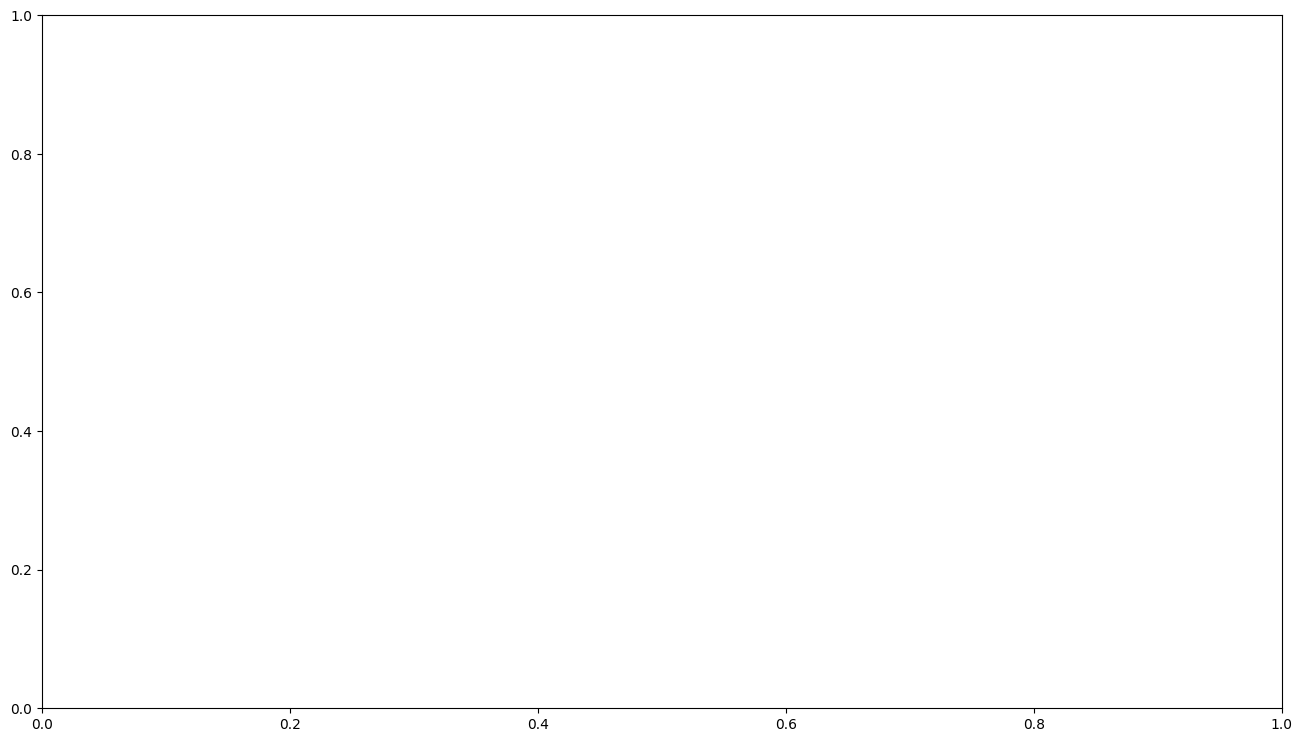

In [ ]:
draw_n_gram(string,2)

                       word  count
0        (Fact, Check, Old)    638
1      (Fact, Check, Viral)    429
2      (Fact, Check, Video)    373
3  (Sushant, Singh, Rajput)    189
4      (Fact, Check, video)    176


ValueError: Names should be list-like for a MultiIndex

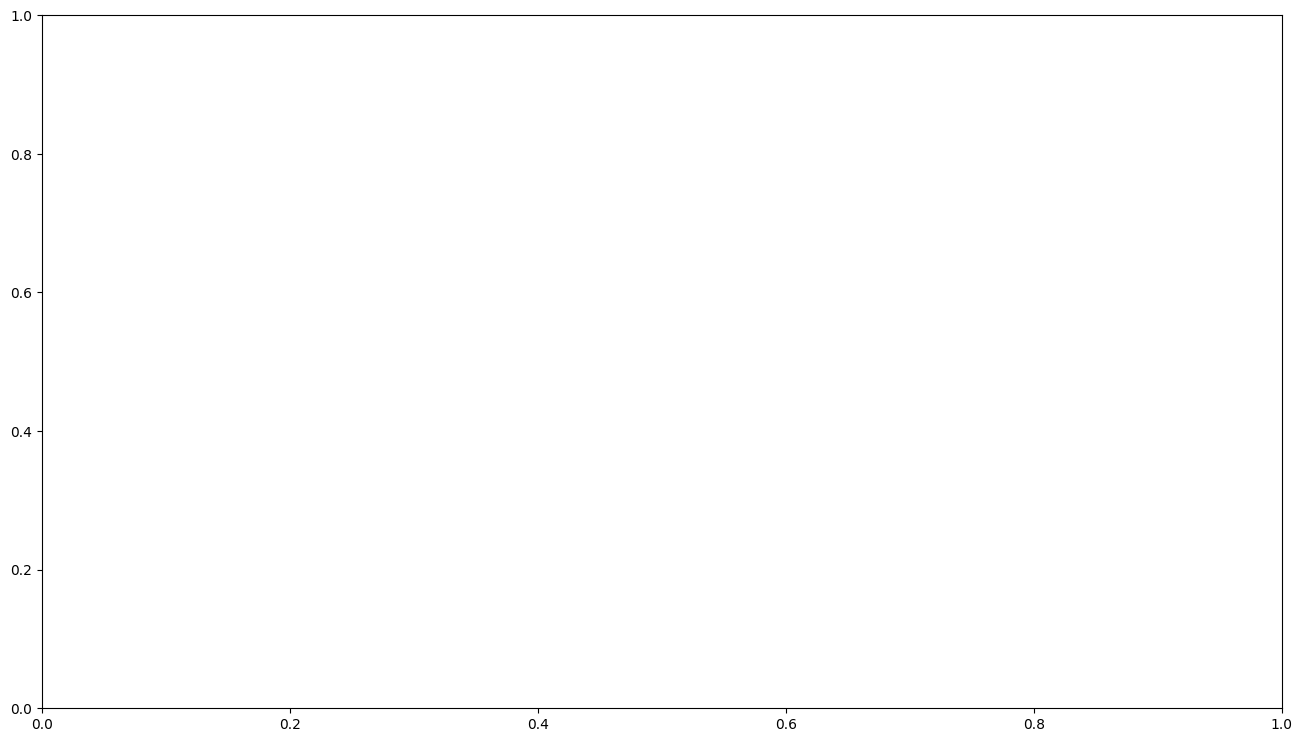

In [ ]:
draw_n_gram(string,3)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = data['text']
y = data['target']
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()





In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [ ]:
print('\n the total number of training data :',y_train.shape)


 the total number of training data : (39699,)


In [ ]:
print('\n the total number of testing data :',y_test.shape)


 the total number of testing data : (17015,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred = classifier_lr.predict(X_test)
# Classification metrics
classification_report = classification_report(y_test, y_pred)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))


 Accuracy:  0.933646782250955


In [ ]:
# Training the classifier & predicting on test data
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)
# Classification metrics

print('\n Accuracy: ', accuracy_score(y_test, y_pred))



 Accuracy:  0.9286511901263591


In [ ]:
classifier_rf = RandomForestClassifier(n_estimators=10)
classifier_rf.fit(X_train, y_train)
y_pred = classifier_rf.predict(X_test)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))


 Accuracy:  0.9305318836320894


In [ ]:
!pip install textblob 

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob
from datetime import datetime

In [ ]:
def timesofindia():
    url = "https://timesofindia.indiatimes.com/home/headlines"
    page_request = requests.get(url)
    data = page_request.content
    soup = BeautifulSoup(data,"html.parser")
    times_of_india_news = []
    counter = 0
    for divtag in soup.find_all('div', {'class': 'headlines-list'}):
        for ultag in divtag.find_all('ul', {'class': 'clearfix'}):
            if (counter <= 10):
                for litag in ultag.find_all('li'):
                    counter = counter + 1
                    print(str(counter),datetime.today().strftime('%Y-%m-%d') + "." + litag.text + " - https://timesofindia.indiatimes.com" + litag.find('a')['href'])
                    times_of_india_news.append(['Times of India',datetime.today().strftime('%Y-%m-%d'),litag.text])
    return times_of_india_news

In [ ]:
times_of_india_news = timesofindia()

1 2023-09-11.Why we should remember Swami Vivekananda and not the terror attack on 9/1110 Sep 2023, 1855 hrs IST - https://timesofindia.indiatimes.com/india/the-true-significance-of-9/11/articleshow/103555212.cms
2 2023-09-11.After Chandrayaan, it's Samudrayaan: All about India's deep dive - https://timesofindia.indiatimes.com/india/matsya-to-take-a-dip-in-bay-of-bengal-next-year/articleshow/103563053.cms
3 2023-09-11.G20 Summit: 6G alliance, other tech and telecom partnerships announced - https://timesofindia.indiatimes.comhttps://www.gadgetsnow.com/slideshows/g20-summit-6g-alliance-and-other-tech-tech-and-telecom-partnerships-announced-by-india-and-the-us/photolist/103580785.cms
4 2023-09-11.Kohli slams 77th ton, becomes fastest to 13,000 ODI runs - https://timesofindia.indiatimes.com/sports/cricket/asia-cup/masterful-virat-kohli-slams-77th-international-ton-becomes-fastest-to-13000-odi-runs/articleshow/103581903.cms
5 2023-09-11.Apple may discontinue these accessories with the new i

In [ ]:
pip install -U pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade setuptools

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/821.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/821.5 kB ? eta -:--:--
   - ------------------------------------- 30.7/821.5 kB 640.0 kB/s eta 0:00:02
   -- ------------------------------------ 61.4/821.5 kB 648.1 kB/s eta 0:00:02
   ---- ---------------------------------- 92.2/821.5 kB 744.7 kB/s eta 0:00:01
   ----- -------------------------------- 112.6/821.5 kB 652.2 kB/s eta 0:00:02
   -------- ----------------------------- 174.1/821.5 kB 803.1 kB/s eta 0:00:01
   ----------- -------------------------- 245.8/821.5 kB 942.1 kB/s eta 0:00:01
   ------------- ------------------------ 297.0/821.5 kB 965.4 kB/s eta 0:00:01
   ------------------- -------------------- 399.4/821.5 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 481.3/821.5 kB 1.2 MB/s eta 0:00:01
   --------------------------- ------------ 563.2/821.5 kB 1

In [ ]:
pip install feedparser

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/81.3 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.3 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.3 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.3 kB 326.8 kB/s eta 0:00:01
   ---------------------------------------- 81.3/81.3 kB 504.3 kB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6060 sha256=a73c975de8d3112e9e0a17e6

In [ ]:
pip install "beautifulsoup4==4.9.1"

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/115.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/115.1 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/115.1 kB 435.7 kB/s eta 0:00:01
   --------------------------- ----------- 81.9/115.1 kB 762.6 kB/s eta 0:00:01
   -------------------------------------- 115.1/115.1 kB 743.4 kB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.3
    Uninstalling beautifulsoup4-4.12.3:
      Successfully uninstalled beautifulsoup4-4.12.3


In [ ]:
pip install "dateparser==0.7.6"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install "requests==2.24.0"

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/41.1 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.1 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 41.1/41.1 kB 655.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/61.8 kB ? eta -:--:--
   ---------------------------------------- 61.8/61.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   ------------------ --------------------- 61.4/133.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  133.1/133.4 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 133.4/133.4 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/58.8 kB ? eta -:--:--
   ---------------------------------------- 58.8/58.8 kB 1.5 MB/s eta 0:00:00
   ---------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-server 2.25.2 requires requests>=2.31, but you have requests 2.24.0 which is incompatible.


In [ ]:
pip install "feedparser==6.0.8"

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/81.0 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.0 kB 640.0 kB/s eta 0:00:01
   ------------------------------ --------- 61.4/81.0 kB 656.4 kB/s eta 0:00:01
   ----------------------------------- ---- 71.7/81.0 kB 558.5 kB/s eta 0:00:01
   ---------------------------------------- 81.0/81.0 kB 502.2 kB/s eta 0:00:00
  Attempting uninstall: feedparser
    Found existing installation: feedparser 6.0.11
    Uninstalling feedparser-6.0.11:
      Successfully uninstalled feedparser-6.0.11


In [ ]:
pip install --no-deps pygooglenews

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pygooglenews import GoogleNews
import json
import time



def fetching_google_news():
    gn = GoogleNews()
    top = gn.top_news()

    entries = top["entries"]
    count = 0
    google_news = []
    for entry in entries:
        count = count + 1
        print( str(count) + ". " + entry["title"] + entry["published"])
        google_news.append(['Google News',entry["published"],entry["title"] ])
        time.sleep(0.25)
    return google_news

In [ ]:
google_news = fetching_google_news()

1. Russian voters, answering Navalny's call, protest Putin's forever rule - The Washington PostSun, 17 Mar 2024 13:31:00 GMT
2. Iceland volcanic eruption: barriers reinforced as lava flows towards town - The GuardianSun, 17 Mar 2024 12:21:00 GMT
3. 'He will come back' - Israeli hostage families cling to hope, and demand a deal - BBC.comSun, 17 Mar 2024 09:07:38 GMT
4. Trump Says Some Migrants Are 'Not People' and Predicts a 'Blood Bath' if He Loses - The New York TimesSun, 17 Mar 2024 02:10:05 GMT
5. Biden's $53 Million February Haul Fuels Money Edge Over Trump - The New York TimesSun, 17 Mar 2024 09:04:13 GMT
6. Fani Willis' Donald Trump Prosecution 'Tainted'—Legal Analyst - NewsweekSat, 16 Mar 2024 19:34:40 GMT
7. New Jersey siege ends after US gunman kills three in Pennsylvania - BBC.comSun, 17 Mar 2024 10:47:28 GMT
8. 2 people killed, 5 others wounded in Washington, DC, shooting, police say - CNNSun, 17 Mar 2024 13:33:00 GMT
9. Biden jokes about Trump's mental fitness at Washington

In [ ]:
news_content = []

In [ ]:
news_content+=times_of_india_news
news_content+= google_news
news_content_df = pd.DataFrame(news_content,columns = ['New_Site','Date' , 'Title'])

NameError: name 'times_of_india_news' is not defined

In [ ]:
news_content_df.head()

NameError: name 'news_content_df' is not defined

In [ ]:
textblob_sentiment=[]
for index , row in news_content_df.iterrows():
    title = row['Title']
    txt= TextBlob(title)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([a,b])

In [ ]:
news_content_df['Text_blob_Polarity'] , news_content_df['Text_blob_Subjectivity'] = zip(*textblob_sentiment)

In [ ]:
news_content_df['Title_clean']=news_content_df['Title'].apply(remove_html)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_punctuations)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_characters)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_stopwords)

In [ ]:
X_real = td.transform(news_content_df['Title_clean']).toarray()

In [ ]:
news_content_df['Prediction_LR'] = classifier_lr.predict(X_real)
news_content_df['Prediction_RF'] = classifier_rf.predict(X_real)
news_content_df['Prediction_NB'] = classifier_nb.predict(X_real)

In [ ]:
news_content_df['Prediction_LR'].replace([1,0], ['True','Fake'],inplace=True)
news_content_df['Prediction_RF'].replace([1,0], ['True','Fake'],inplace=True)
news_content_df['Prediction_NB'].replace([1,0], ['True','Fake'],inplace=True)

In [ ]:
news_content_df.head()

,New_Site,Date,Title,Text_blob_Polarity,Text_blob_Subjectivity,Title_clean,Prediction_LR,Prediction_RF,Prediction_NB
0,Times of India,2023-09-11,Why we should remember Swami Vivekananda and n...,0.000000,0.000000,remember Swami Vivekananda terror attack Sep h...,True,True,True
1,Times of India,2023-09-11,"After Chandrayaan, it's Samudrayaan: All about...",0.000000,0.400000,Chandrayaan Samudrayaan India deep dive,True,Fake,True
2,Times of India,2023-09-11,"G20 Summit: 6G alliance, other tech and teleco...",-0.125000,0.375000,G Summit G alliance tech telecom partnerships ...,True,True,True
3,Times of India,2023-09-11,"Kohli slams 77th ton, becomes fastest to 13,00...",0.000000,0.000000,Kohli slams th ton becomes fastest ODI runs,True,True,True
4,Times of India,2023-09-11,Apple may discontinue these accessories with t...,0.136364,0.454545,Apple may discontinue accessories new iPhones ...,True,True,True


In [ ]:
news_content_df.to_excel('Result.xlsx')

In [ ]:
def real_time_prediction(news):
  news_transformed = td.transform([news]).toarray()
  Prediction_LR = classifier_lr.predict(news_transformed)
  Prediction_RF = classifier_rf.predict(news_transformed)
  Prediction_NB = classifier_nb.predict(news_transformed)
  Prediction_LR = ['Real'  if i == 1 else 'Fake' for i in Prediction_LR ]
  print(f"Based on Logistic Regression model this News is ::{Prediction_LR[0]}")
  Prediction_RF = ['Real'  if i == 1 else 'Fake' for i in Prediction_RF ]
  print(f"Based on  Random Forest Model this News is ::{Prediction_RF[0]}")
  Prediction_NB = ['Real'  if i == 1 else 'Fake' for i in Prediction_NB ]
  print(f"Based on Naive Bayes model this News is :: {Prediction_NB[0]} ")

In [ ]:
news = input("Please Enter the News which you want to predict : ")
real_time_prediction(news)

Please Enter the News which you want to predict : Manipur crisis came into control
Based on Logistic Regression model this News is ::Real
Based on  Random Forest Model this News is ::Real
Based on Naive Bayes model this News is :: Real 


In [ ]:
news = input("Please Enter the News which you want to predict : ")
real_time_prediction(news)
